In [1]:
# imports
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import supervision as sv

In [58]:
# get frames for initializing 
cap = cv.VideoCapture(1)
model = YOLO('yolov8n.pt')
names = model.names
savedFrames = []
savedBoxes = []

itr = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    results = model(frame)

    for result in results:
        save_buffer = []
        box_buffer = []
        boxes = result.boxes.cpu().numpy()
        
        for box, xywh in zip(boxes.cls, boxes.xyxy):
            if names[box] == 'person':
                x1, y1, x2, y2 = map(int,xywh)
                
                # print(x, y, w, h)
                person_roi = frame[y1:y2, x1:x2]
                save_buffer.append(person_roi)
        if len(save_buffer) == 1:
            savedFrames.append(save_buffer[0])
        else:
            break

    detections = sv.Detections(
                    xyxy=results[0].boxes.xyxy.cpu().numpy(),
                    confidence=results[0].boxes.conf.cpu().numpy(),
                    class_id=results[0].boxes.cls.cpu().numpy().astype(int),
                    )

    frame = sv.BoxAnnotator(sv.ColorPalette.default(), thickness=3, text_thickness=3, text_scale=1.5).annotate(scene=frame, detections=detections)
    cv.imshow('Live Video', frame)
    if cv.waitKey(1) & 0xFF == 27:  # Press 'Esc' key to exit the loop
        break

cap.release()
cv.destroyAllWindows()


0: 384x640 1 cup, 67.3ms
Speed: 4.1ms preprocess, 67.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 suitcase, 1 cup, 57.8ms
Speed: 1.8ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cup, 2 chairs, 1 tv, 54.7ms
Speed: 1.5ms preprocess, 54.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 cup, 2 chairs, 1 tv, 51.9ms
Speed: 1.7ms preprocess, 51.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cups, 3 chairs, 52.2ms
Speed: 1.9ms preprocess, 52.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cups, 2 chairs, 55.3ms
Speed: 1.6ms preprocess, 55.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 cup, 2 chairs, 66.7ms
Speed: 1.4ms preprocess, 66.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 1 cup, 2 chairs, 56.0ms
Speed: 

IndexError: list index out of range

In [4]:
cap.release()
cv.destroyAllWindows()

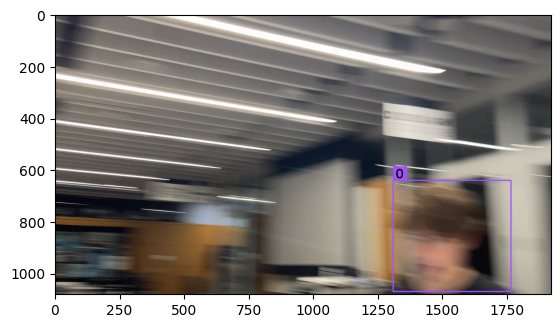

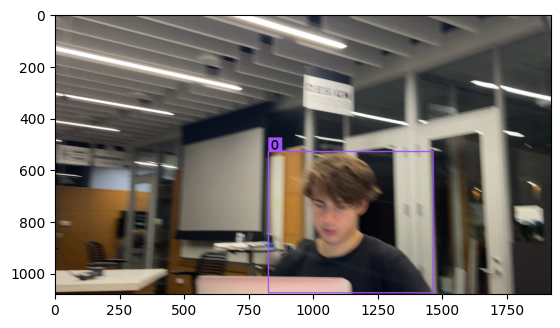

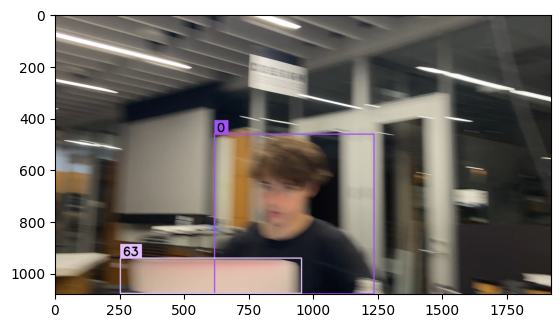

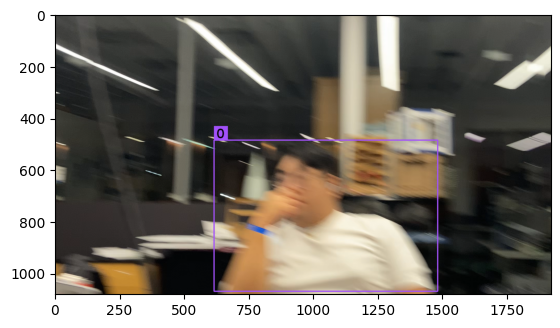

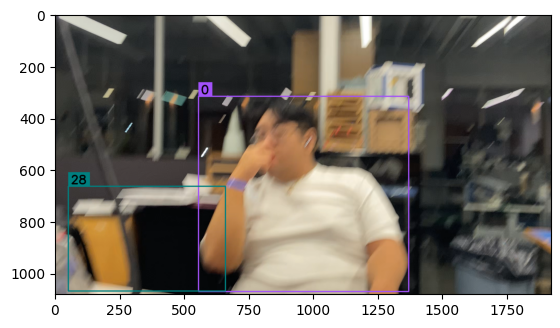

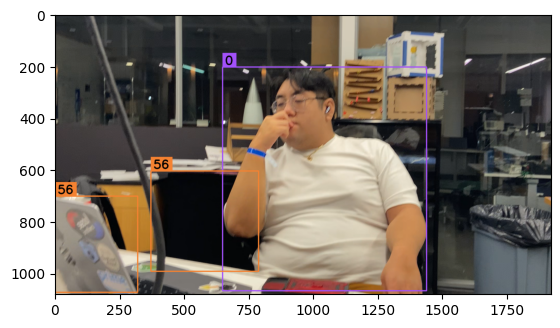

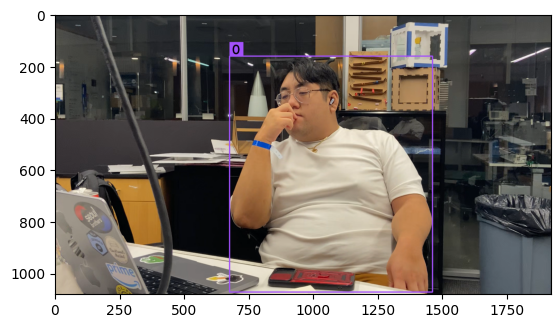

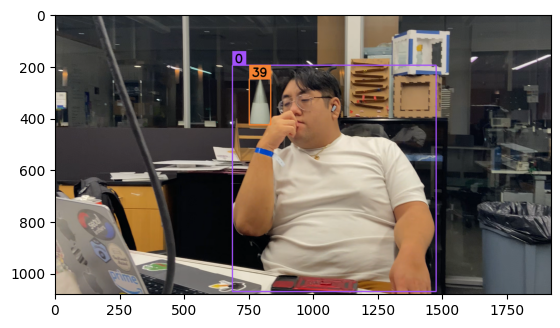

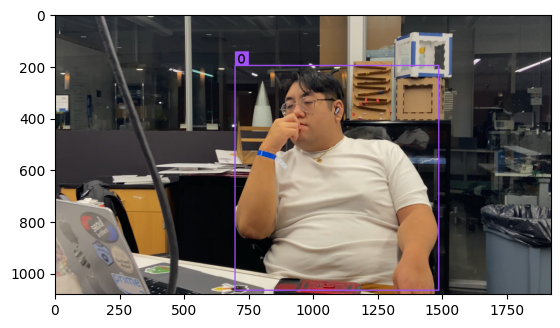

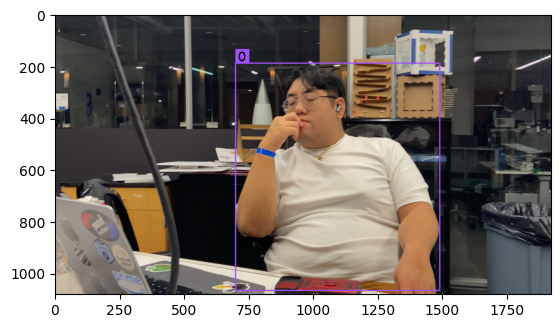

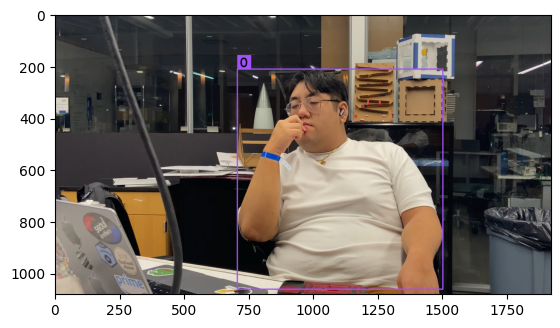

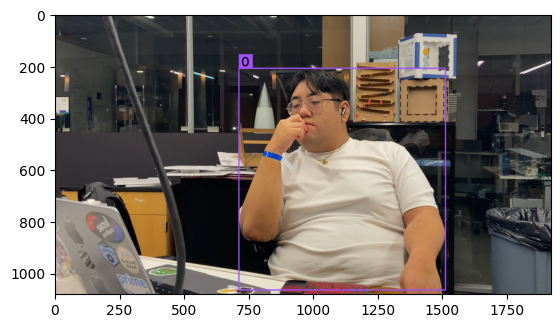

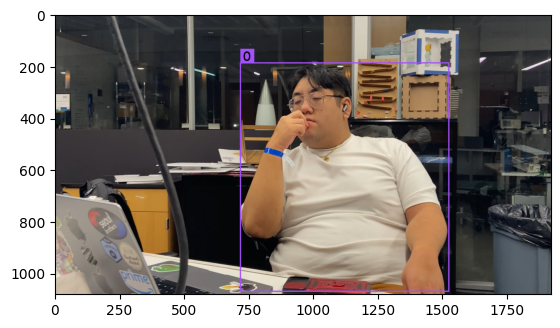

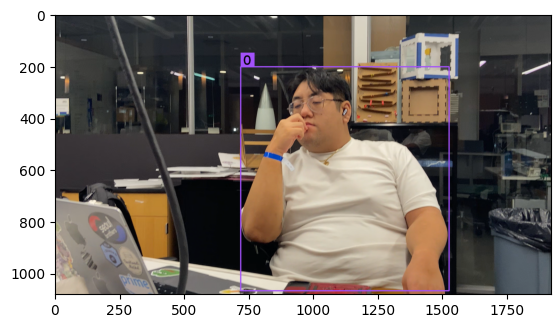

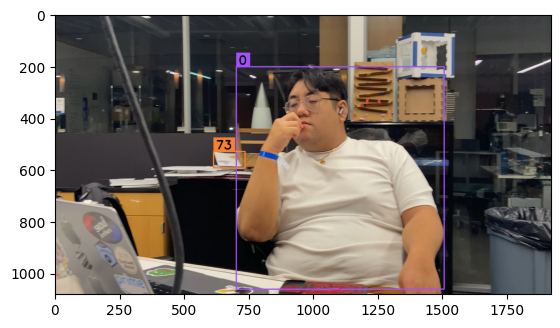

In [55]:
for frame in savedFrames:
    rgb = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    plt.imshow(rgb)

    # print(frame)
    plt.show()

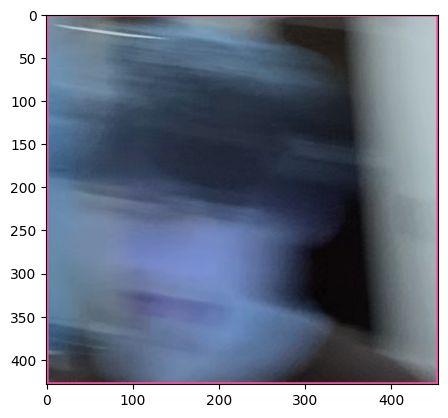

[     1306.6       641.5      1761.2      1070.7]


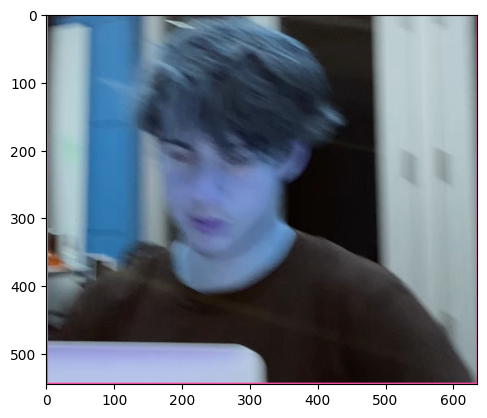

[     824.18      530.49      1460.6      1075.8]


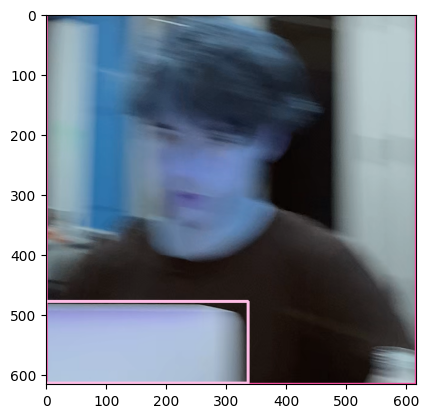

[     616.31      463.51      1232.4      1079.9]


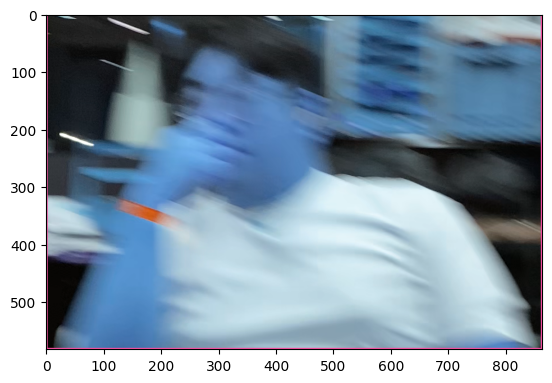

[     614.21      486.14      1478.1      1069.3]


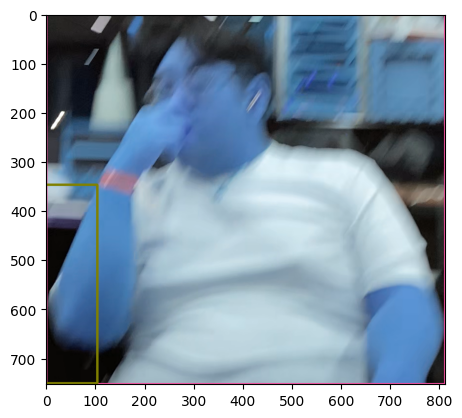

[      554.5      317.99        1367      1070.4]


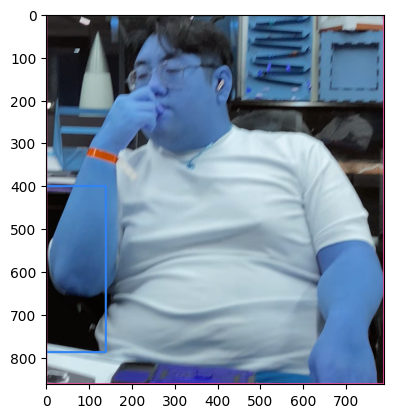

[     647.86         204      1435.9        1068]


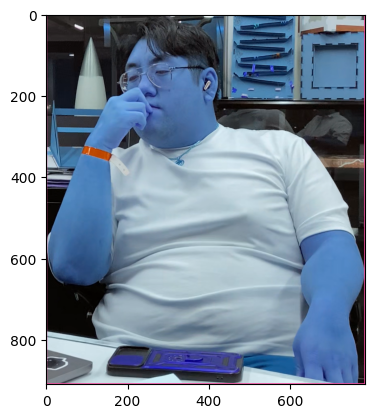

[      674.2      162.74      1458.6      1072.2]


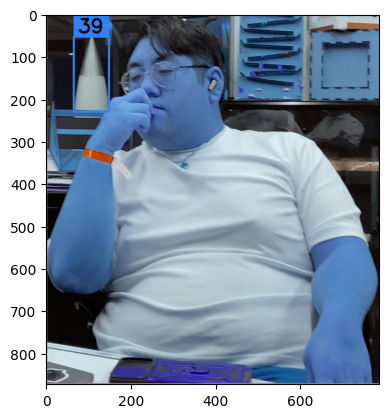

[     685.11      197.42      1472.9      1070.7]


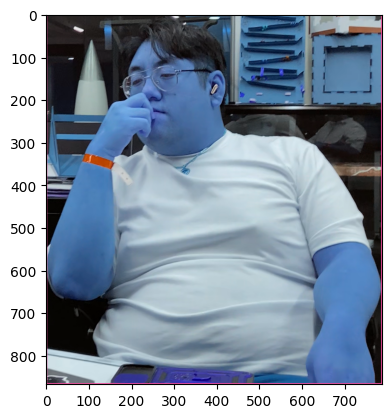

[     695.37      198.49      1482.3      1065.7]


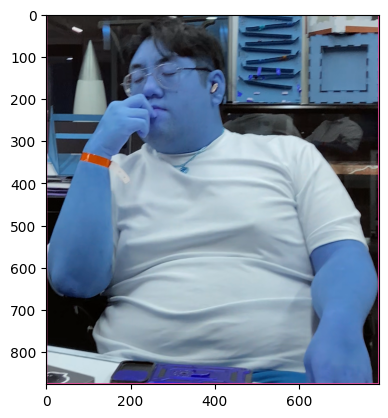

[     697.67      189.06      1486.6      1066.9]


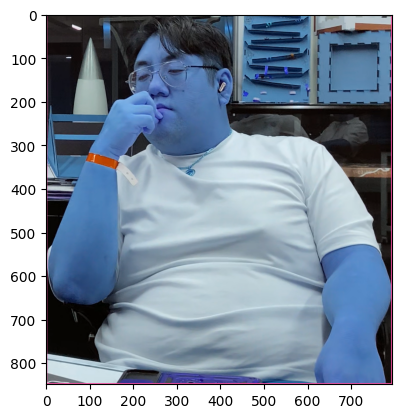

[     704.97      212.97        1498      1061.5]


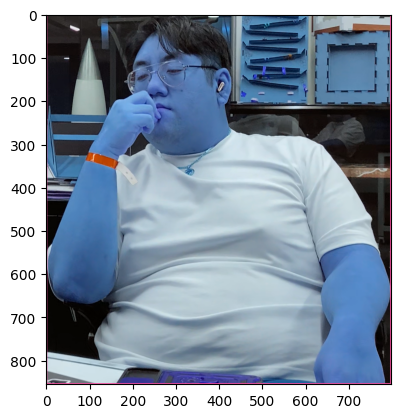

[      710.5      209.39      1508.5      1064.3]


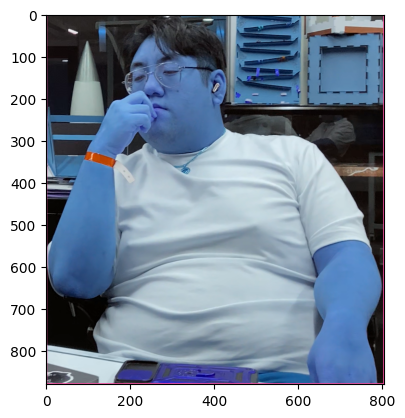

[     716.76      188.17      1521.4      1069.1]


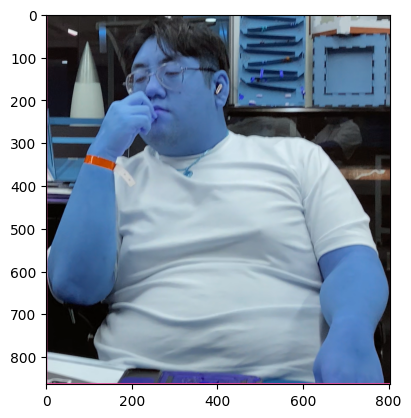

[     717.19       203.6      1522.8      1067.2]


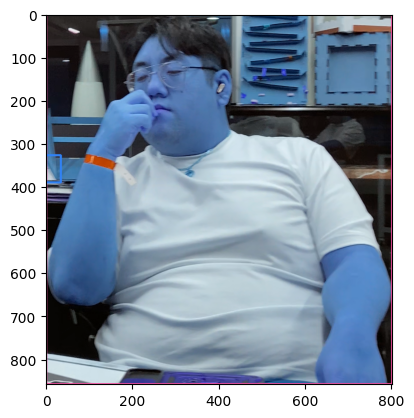

[     700.93      203.58      1503.9      1061.9]


In [57]:
for box,frame in zip(savedBoxes, savedFrames):
    x1, y1, x2, y2 = map(int,box)
    person_roi = frame[y1:y2, x1:x2]
    plt.imshow(person_roi)
    plt.show()
    print(box)